In [1]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("C:/Users/Vishali Manivannan/Desktop/LtesUpgrade/general_data.csv")

In [41]:
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [42]:
data.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,...,0.0,Y,12,8,0,NaN,6,21,3,9


In [5]:
data.shape

(4410, 24)

In [6]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [8]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


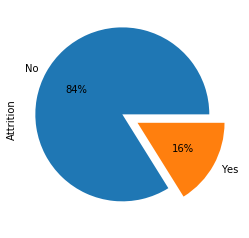

In [9]:
explode = (0.1,0.1)
data.Attrition.value_counts().plot(kind='pie',explode=explode, autopct = "%1.0f%%")

### From the above graph, we conclude that 16% employees are leaving

In [10]:
data.Age.value_counts()

35    234
34    231
36    207
31    207
29    204
32    183
30    180
38    174
33    174
40    171
37    150
28    144
27    144
42    138
39    126
45    123
41    120
26    117
46     99
44     99
43     96
50     90
24     78
25     78
47     72
49     72
55     66
53     57
51     57
48     57
54     54
52     54
22     48
23     42
58     42
56     42
21     39
20     33
59     30
19     27
18     24
60     15
57     12
Name: Age, dtype: int64

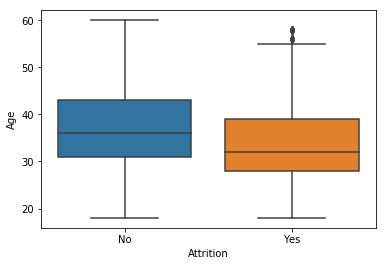

In [11]:
sns.boxplot(x='Attrition', y='Age', data=data)

In [12]:
data.Attrition.replace(to_replace  = ("No","Yes"),value = (0,1),inplace = True)

In [13]:
data.corr()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.299243,-0.033137,NaN,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.009730,-0.015111,NaN,-0.004729,-0.010290,-0.031176,0.042345,0.032533,NaN,-0.006839,-0.170338,-0.049431,-0.134392,-0.033019,-0.156199
DistanceFromHome,0.006963,-0.009730,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013843,0.038125,NaN,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.015111,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016250,-0.040531,NaN,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.004729,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.001117,-0.004456,NaN,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579
JobLevel,-0.002884,-0.010290,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.009875,0.010973,NaN,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.031176,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020726,0.004325,NaN,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299243,0.042345,-0.013843,-0.016250,NaN,-0.001117,-0.009875,-0.020726,1.000000,0.030860,NaN,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667
PercentSalaryHike,-0.033137,0.032533,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030860,1.000000,NaN,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864


In [14]:
stats,p = pearsonr(data.Attrition, data.Age)
print(stats, p)

-0.1592050068657796 1.9968016158845057e-26


### Hypothesis - 1
From the above plot we can say :

    *) The employee having average age of 35 has more attrition
         i)  Null Hypothesis (H0) = Age and Attrition have no correlation
         ii) Alternate Hypothesis (H1) = Age and Attrition have correlation
             r = -0.1592050068657796
             p = 1.9968016158845057e-26
             r is negative and p<0.05 so Null Hypothesis (H0) is rejected and negative correlation between attrition and    age.

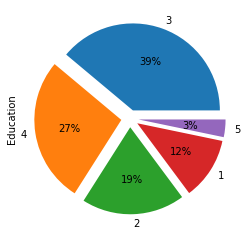

In [15]:
explode = (0.1,0.1,0.1,0.1,0.1)
data.Education.value_counts().plot(kind='pie',explode=explode, autopct = "%1.0f%%")

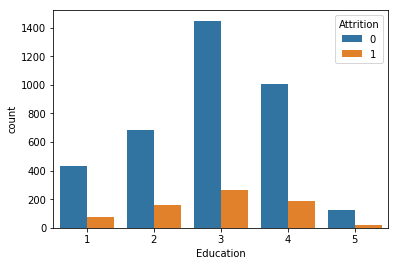

In [16]:
sns.countplot(x='Education', hue='Attrition', data=data)

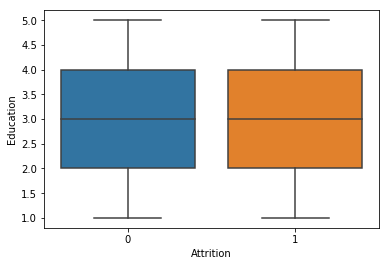

In [17]:
sns.boxplot(x='Attrition', y='Education', data=data)

In [18]:
stats,p = pearsonr(data.Attrition, data.Education)
print(stats, p)

-0.015111167710968744 0.3157293177115451


### Hypothesis - 2
From the above plot we can say :

    *) There is attrition  based on all the category of education  
          i)  Null Hypothesis (H0) = Education and Attrition have correlation
         ii) Alternate Hypothesis (H1) = Education and Attrition have no correlation
             r = -0.015111167710968744
             p = 0.3157293177115451
             r is negative and p>0.05 so Null Hypothesis (H0) is accepted and  negative correlation between attrition and   education.

In [19]:
data.YearsWithCurrManager.value_counts()

2     1032
0      789
7      648
3      426
8      321
4      294
1      228
9      192
5       93
6       87
10      81
11      66
12      54
13      42
17      21
14      15
15      15
16       6
Name: YearsWithCurrManager, dtype: int64

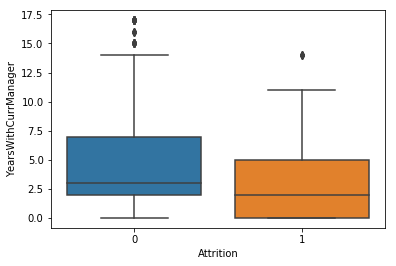

In [20]:
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=data)

In [21]:
stats,p = pearsonr(data.Attrition, data.YearsWithCurrManager)
print(stats, p)

-0.15619931590162842 1.7339322652874626e-25


### Hypothesis - 3
From the above plot we can say :

    *) The employee, who are working with current manager more than 2.5 years 
         i)  Null Hypothesis (H0) = YearsWithCurrManager and Attrition have no correlation
         ii) Alternate Hypothesis (H1) = YearsWithCurrManager and Attrition have correlation
             r = -0.15619931590162842
             p = 1.7339322652874626e-25
             r is negative and p<0.05 so Null Hypothesis (H0) is rejected and negative correlation between attrition and    YearsWithCurrManager.

In [22]:
data.YearsSinceLastPromotion.value_counts()

0     1743
1     1071
2      477
7      228
4      183
3      156
5      135
6       96
11      72
8       54
9       51
15      39
13      30
12      30
14      27
10      18
Name: YearsSinceLastPromotion, dtype: int64

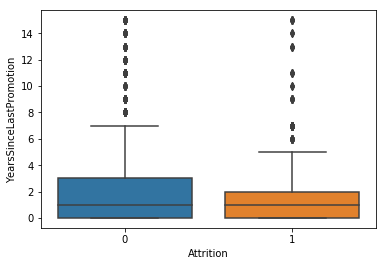

In [23]:
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=data)

In [24]:
stats,p = pearsonr(data.Attrition, data.YearsSinceLastPromotion)
print(stats, p)

-0.03301877514258439 0.02833033618936241


### Hypothesis - 4
From the above plot we can say :

    *) If the employee has 1+ year after promotion has less atrrition 
         i)  Null Hypothesis (H0) = YearsSinceLastPromotion and Attrition have no correlation
         ii) Alternate Hypothesis (H1) = YearsSinceLastPromotion and Attrition have correlation
             r = -0.03301877514258439
             p = 0.02833033618936241
             r is negative and p<0.05 so Null Hypothesis (H0) is rejected and negative correlation between attrition and    YearsSinceLastPromotion.

In [25]:
data.YearsAtCompany.value_counts()

5     588
1     513
3     384
2     381
10    360
4     330
7     270
9     246
8     240
6     228
0     132
11     96
20     81
13     72
15     60
14     54
22     45
12     42
21     42
18     39
16     36
19     33
17     27
24     18
33     15
25     12
26     12
32      9
31      9
29      6
36      6
27      6
23      6
40      3
37      3
30      3
34      3
Name: YearsAtCompany, dtype: int64

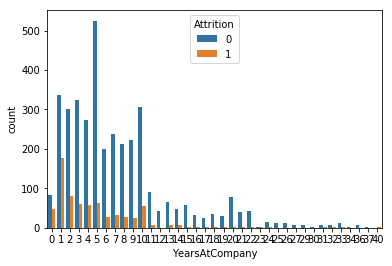

In [26]:
sns.countplot(x='YearsAtCompany', hue='Attrition',data=data )

In [27]:
stats,p = pearsonr(data.Attrition, data.YearsAtCompany)
print(stats, p)

-0.13439221398997717 3.16388312248436e-19


### Hypothesis - 5
From the above plot we can say :

    *) The employee, who are working more than 5 years have high attrition rate 
      i)  Null Hypothesis (H0) = YearsAtCompany and Attrition have no correlation
     ii) Alternate Hypothesis (H1) = YearsAtCompany and Attrition have correlation
         r = -0.13439221398997717
         p = 3.16388312248436e-19
         r is negative and p<0.05 so Null Hypothesis (H0) is rejected and negative correlation between attrition and    YearsAtCompany.

In [28]:
data.PercentSalaryHike.value_counts()

11    630
13    627
14    603
12    594
15    303
18    267
17    246
16    234
19    228
22    168
20    165
21    144
23     84
24     63
25     54
Name: PercentSalaryHike, dtype: int64

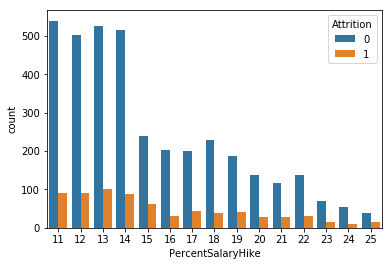

In [29]:
sns.countplot(x='PercentSalaryHike', hue='Attrition', data=data)

In [30]:
stats,p = pearsonr(data.Attrition, data.PercentSalaryHike)
print(stats, p)

0.032532594891053514 0.030743386433316814


### Hypothesis - 6
From the above plot we can say :

    *) The employee, who are getting less than or equal to 13% has more attrition  
      i)  Null Hypothesis (H0) = PercentSalaryHike and Attrition have no correlation
     ii) Alternate Hypothesis (H1) = PercentSalaryHike and Attrition have correlation
         r = 0.032532594891053514
         p = 0.030743386433316814
         r is positive and p<0.05 so Null Hypothesis (H0) is rejected and positive correlation between attrition and    PercentSalaryHike.

In [31]:
data.JobLevel.value_counts()

1    1629
2    1602
3     654
4     318
5     207
Name: JobLevel, dtype: int64

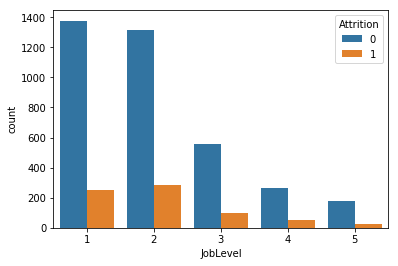

In [32]:
sns.countplot(x='JobLevel', hue='Attrition', data=data)

In [33]:
stats,p = pearsonr(data.Attrition, data.JobLevel)
print(stats, p)

-0.01028971328749503 0.4945171727200731


### Hypothesis - 7
From the above plot we can say :

    *) Employee having joblevel less than or equal to 2 have high attrition rate
      i)  Null Hypothesis (H0) = JobLevel and Attrition have correlation
     ii) Alternate Hypothesis (H1) = JobLevel and Attrition have no correlation
     r = -0.01028971328749503
     p = 0.4945171727200731
     r is negative and p>0.05 so Null Hypothesis (H0) is accepted and negative correlation between attrition and  JobLevel.